In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
import seaborn as sn

In [2]:
dataset = load_digits()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

y


array([0, 1, 2, ..., 8, 9, 8])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
clf =  GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[3,5,8,10]}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 8, 10]})

In [17]:
clf.best_score_

0.985387630662021

In [18]:
clf.best_params_

{'n_neighbors': 3}

In [19]:
clf.predict(X_test)

array([7, 3, 3, 9, 1, 8, 0, 4, 1, 1, 6, 5, 5, 3, 7, 6, 2, 2, 5, 8, 0, 5,
       9, 3, 3, 4, 0, 8, 5, 8, 6, 9, 6, 3, 6, 0, 1, 3, 0, 3, 2, 2, 2, 4,
       2, 6, 7, 0, 1, 2, 3, 1, 6, 8, 6, 5, 8, 5, 8, 2, 6, 6, 9, 7, 1, 2,
       1, 1, 5, 1, 1, 4, 3, 0, 6, 8, 7, 2, 0, 6, 5, 8, 4, 7, 7, 4, 5, 2,
       9, 9, 7, 3, 6, 6, 0, 3, 6, 1, 1, 9, 0, 6, 5, 6, 9, 6, 8, 2, 5, 0,
       9, 3, 4, 6, 3, 5, 4, 5, 0, 5, 8, 4, 8, 1, 4, 3, 8, 5, 2, 8, 6, 9,
       2, 7, 3, 9, 5, 6, 5, 4, 3, 6, 0, 3, 8, 7, 4, 3, 1, 8, 9, 5, 7, 2,
       1, 5, 2, 3, 2, 2, 0, 6, 5, 2, 2, 9, 0, 2, 8, 1, 0, 7, 2, 5, 8, 3,
       6, 9, 0, 2, 3, 1, 5, 7, 2, 8, 5, 7, 9, 2, 9, 8, 9, 3, 4, 6, 9, 5,
       5, 1, 3, 4, 2, 0, 4, 3, 1, 5, 4, 9, 9, 9, 5, 4, 9, 6, 7, 0, 9, 0,
       1, 2, 4, 4, 7, 4, 2, 5, 2, 9, 7, 4, 8, 5, 0, 4, 4, 8, 0, 9, 8, 1,
       4, 3, 1, 8, 2, 4, 4, 9, 6, 5, 3, 0, 5, 2, 2, 8, 2, 6, 3, 5, 0, 6,
       7, 5, 1, 3, 1, 6, 1, 3, 2, 7, 5, 5, 7, 5, 8, 5, 5, 7, 2, 3, 9, 3,
       1, 3, 5, 4, 8, 8, 7, 2, 4, 0, 6, 0, 6, 1, 0,

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_predict = knn.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_predict)

In [24]:
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

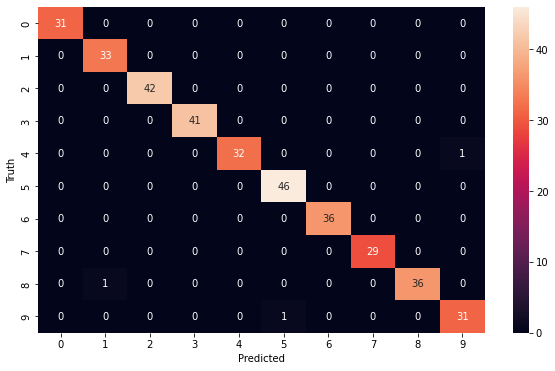

In [26]:
plt.figure(figsize=(10,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        41
           4       1.00      0.97      0.98        33
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        29
           8       1.00      0.97      0.99        37
           9       0.97      0.97      0.97        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

